In [1]:
import pandas as pd 

In [2]:
import os 
os.getcwd()

'/home/maciektr/Programowanie/parallel_lab/cuda/Lab3/report'

In [36]:
df = pd.read_csv("../1 Reduction/result.txt")
# .sort_values(['type', 'size', 'block_size'])\
# .reset_index().drop(columns=["index"])
df

,type,size,time,bandwidth
0,global,8,238.264,0.000004
1,global,10,287.613,0.000014
2,global,12,338.949,0.000048
3,global,14,377.928,0.000173
4,global,16,426.874,0.000614
5,global,20,522.798,0.008023
6,global,24,615.894,0.108962
7,global,28,702.750,1.527915
8,global,30,766.724,5.601713
9,shared,8,53.739,0.000019


In [37]:
pivoted = df.drop(columns=['bandwidth']).pivot(values='time', columns='type', index='size')
pivoted

type,global,shared
size,,
8,238.264,53.739
10,287.613,74.334
12,338.949,71.204
14,377.928,71.102
16,426.874,71.771
18,479.861,94.431
20,522.798,95.261
22,567.461,94.584
24,615.894,95.200


<AxesSubplot:title={'center':'Execution time by problem size.'}, xlabel='size'>

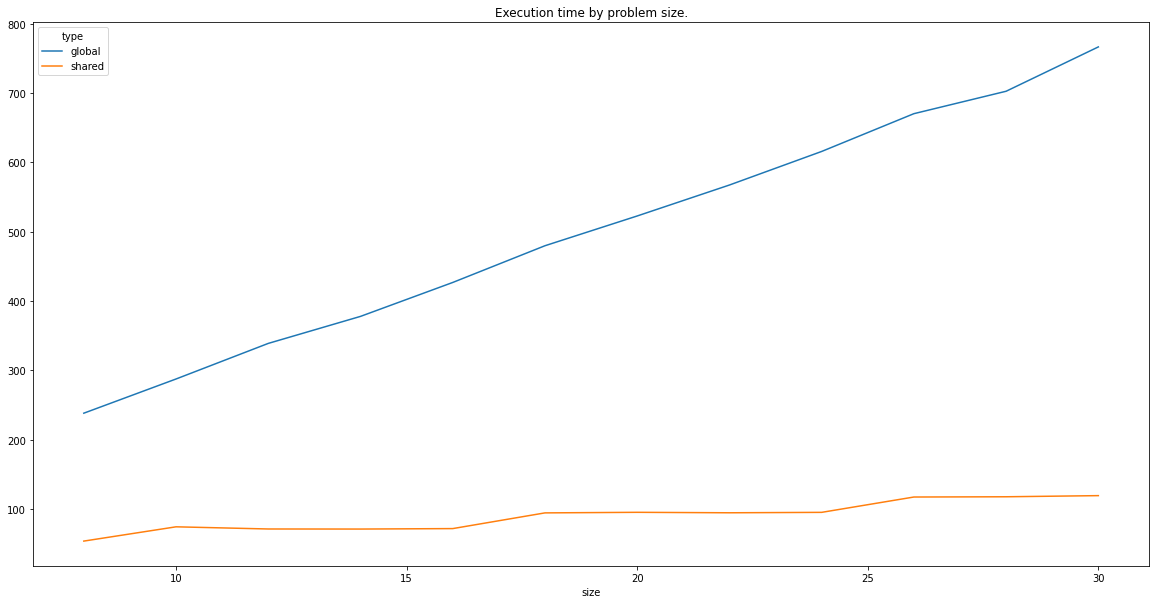

In [38]:
pivoted.plot(figsize=(20,10), title='Execution time by problem size.')

<AxesSubplot:title={'center':'Execution time by problem size, log scale.'}, xlabel='size'>

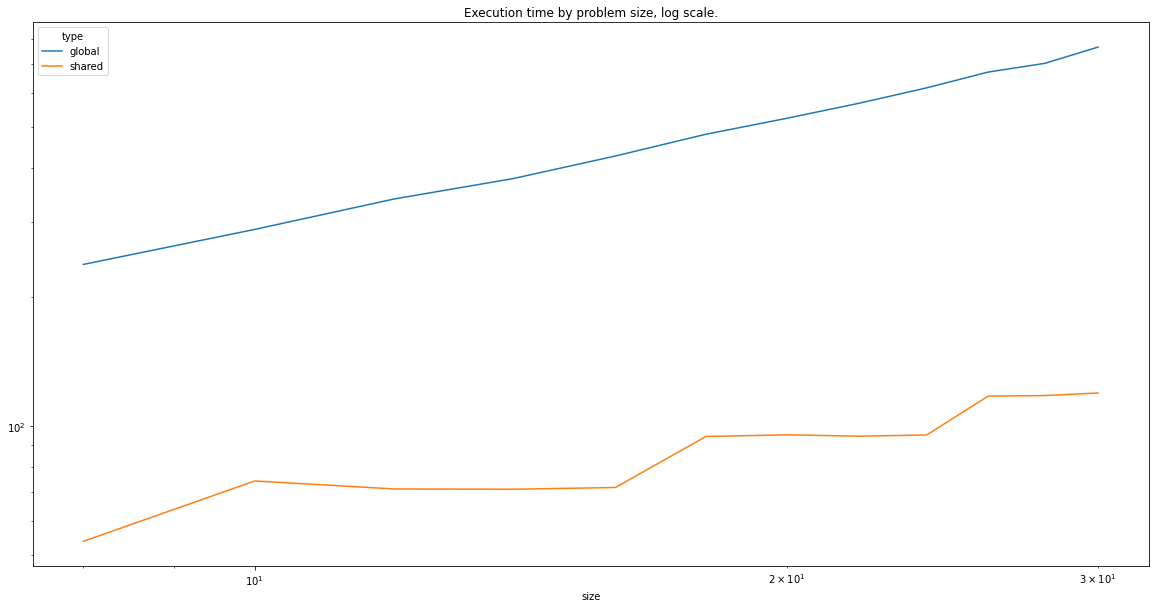

In [39]:
pivoted.plot(figsize=(20,10), title='Execution time by problem size, log scale.', logx=True, logy=True)

In [42]:
df = pd.read_csv("../5 Histogram/result.txt").groupby(by=['type', 'bin_count']).mean().reset_index()
df

,type,bin_count,time
0,naive,10,513.543636
1,naive,50,531.255636
2,naive,100,515.714273
3,naive,500,496.620636
4,naive,1000,512.785000
5,simple,10,515.964091
6,simple,50,504.850000
7,simple,100,508.006455
8,simple,500,520.514000
9,simple,1000,514.522636


In [43]:
pivoted = df.pivot(values='time', columns='type', index='bin_count')
pivoted

type,naive,simple
bin_count,,
10,513.543636,515.964091
50,531.255636,504.850000
100,515.714273,508.006455
500,496.620636,520.514000
1000,512.785000,514.522636


<AxesSubplot:title={'center':'Execution time by bin count.'}, xlabel='bin_count'>

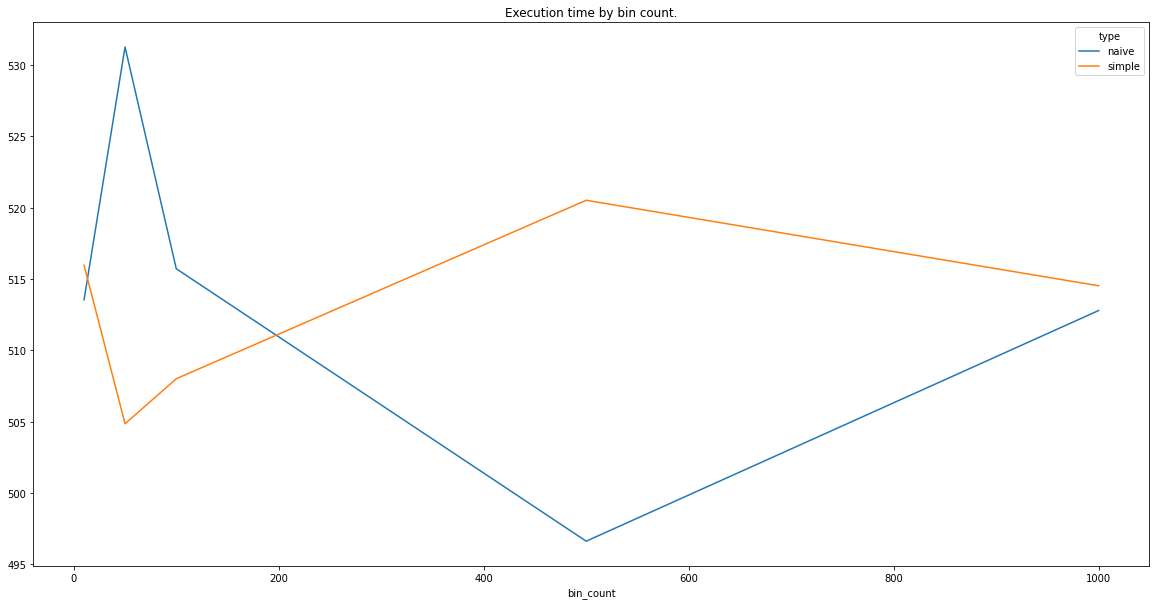

In [44]:
pivoted.plot(figsize=(20,10), title='Execution time by bin count.')

<AxesSubplot:xlabel='bin_count'>

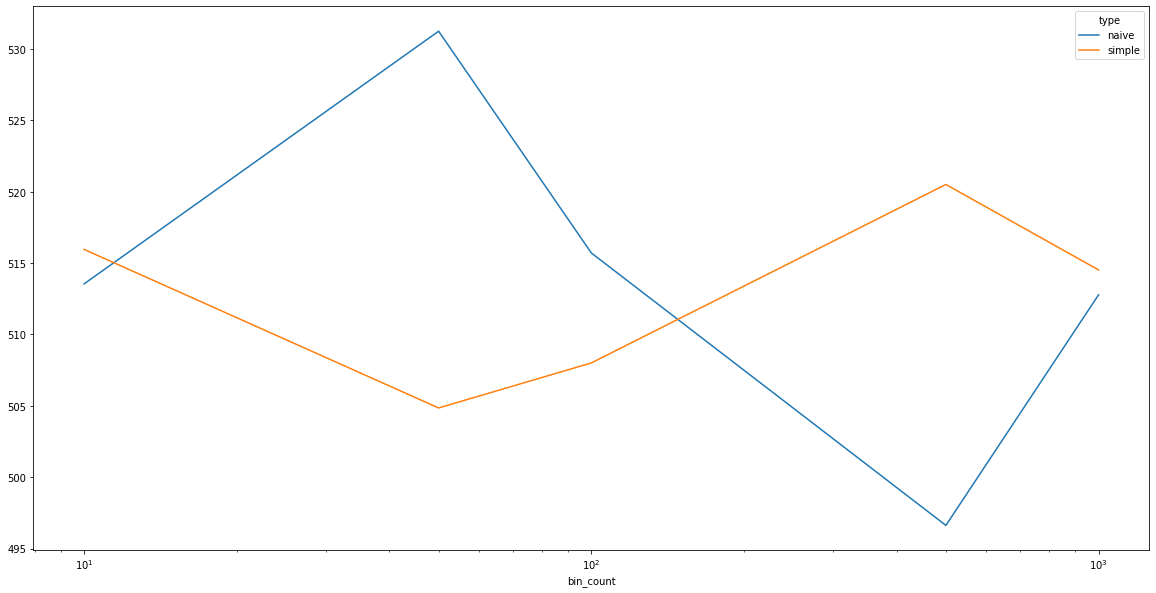

In [34]:
pivoted.plot(figsize=(20,10), logx=True)